In [1]:
## read data into pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

movie_df = pd.read_table("combineddata.tsv", low_memory=False)


In [2]:
movie_df.head()

,tconst,language,title type,primary title,original title,isAdult,start year,end year,runtime minutes,genres,averageRating,numVotes
0,tt0123368,Czech,movie,...and the Fifth Horseman Is Fear,...a p√°t√Ω jezdec je Strach,0,1965,\N,100,"Drama,War",7.2,594
1,tt0123370,Hindi,movie,Return of Robin Hood,Aaj Ka Robin Hood,0,1988,\N,80,Drama,7.0,30
2,tt0123371,English,movie,Aberration,Aberration,0,1997,\N,93,"Horror,Sci-Fi",4.6,998
3,tt0123373,Danish,movie,Evening Land,Aftenlandet,0,1977,\N,109,"Drama,Sci-Fi",7.2,135
4,tt0123376,English,movie,Alegría,Alegr√≠a,0,1999,\N,94,"Drama,Fantasy,Romance",6.5,565


In [3]:
## get unique languages
languages = []

for lang in movie_df['language']:
    if lang not in languages:
        languages.append(lang)

In [4]:
## get top 30 language counts
## get languages that have more than 100 movies

movie_languages =  movie_df['language'].value_counts()
top_30_lang = movie_languages[1:31].index.tolist()
plus_100_lang = movie_languages[movie_languages>100].index.tolist()
print(top_30_lang)
print(plus_100_lang)

['Spanish', 'French', 'German', 'Italian', 'Japanese', 'Russian', 'Hindi', 'Portuguese', 'Mandarin', 'Turkish', 'Korean', 'Cantonese', 'Greek', 'Swedish', 'Tamil', 'Arabic', 'Polish', 'Malayalam', 'Czech', 'Telugu', 'Dutch', 'Persian', 'Danish', 'Tagalog', 'Finnish', 'Bengali', 'Hungarian', 'Indonesian', 'Chinese', 'Norwegian']
['English', 'Spanish', 'French', 'German', 'Italian', 'Japanese', 'Russian', 'Hindi', 'Portuguese', 'Mandarin', 'Turkish', 'Korean', 'Cantonese', 'Greek', 'Swedish', 'Tamil', 'Arabic', 'Polish', 'Malayalam', 'Czech', 'Telugu', 'Dutch', 'Persian', 'Danish', 'Tagalog', 'Finnish', 'Bengali', 'Hungarian', 'Indonesian', 'Chinese', 'Norwegian', 'Hebrew', 'Romanian', 'Kannada', 'Thai', 'Serbo-Croatian', 'Bulgarian', 'Malay', 'Serbian', 'None', 'Marathi', 'Ukrainian', 'Croatian', 'Punjabi', 'Georgian', 'Slovenian', 'Slovak', 'Vietnamese', 'Estonian', 'Latvian', 'Lithuanian', 'Azerbaijani', 'Catalan', 'Icelandic', 'Armenian', 'Albanian', 'Urdu', 'Afrikaans', 'Gujarati', 

In [5]:
# split into english and nonenglish tables

df_english =movie_df.query("language == 'English' & numVotes>100")
df_nonenglish = movie_df.query("language != 'English' & numVotes>100")


59731
56508


array([[<AxesSubplot: title={'center': 'averageRating'}>]], dtype=object)

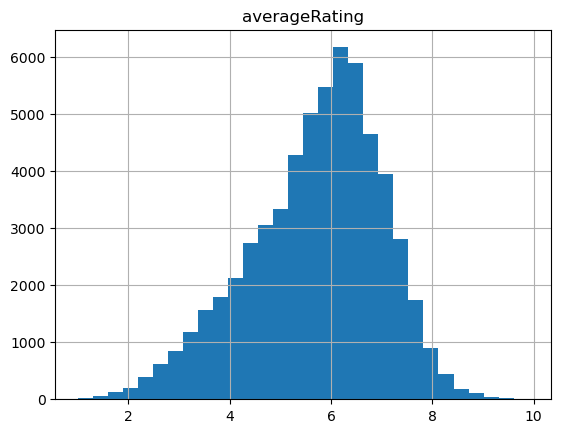

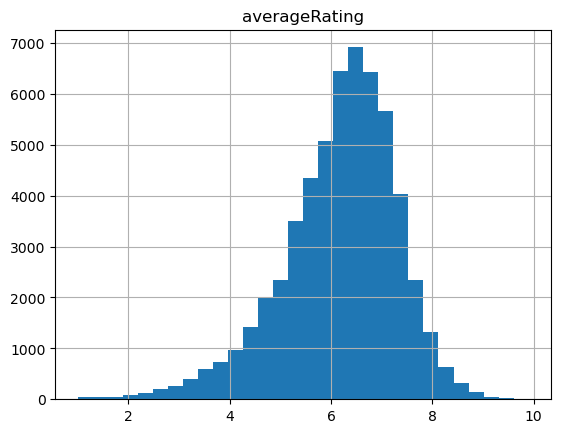

In [6]:


#print(df_english_np)
#np.histogram(df_english_np, bins='auto')

print(len(df_english))
print(len(df_nonenglish))

#graph english average rating histogram, and nonenglish average rating histogram
df_english.hist(column='averageRating', bins=30)
df_nonenglish.hist(column='averageRating', bins=30)

In [7]:
#get x and y point to graph scatterplot for english and nonenglish movies for number of votes vs average rating

poly_x_eng = pd.DataFrame(df_english['numVotes']).to_numpy()
poly_y_eng = pd.DataFrame(df_english['averageRating']).to_numpy()

poly_x_noneng = pd.DataFrame(df_nonenglish['numVotes']).to_numpy()
poly_y_noneng = pd.DataFrame(df_nonenglish['averageRating']).to_numpy()


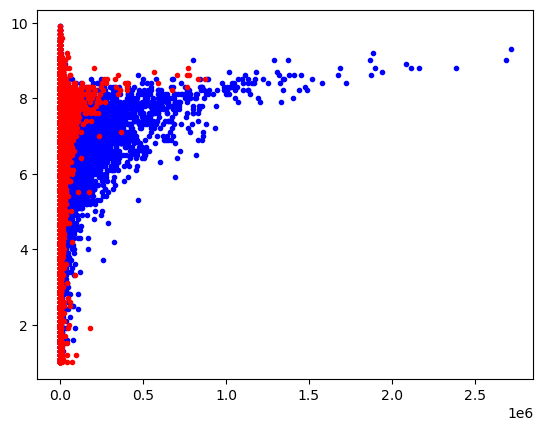

In [8]:
#poly = pd.DataFrame( {'x' : poly_x_eng, 'y': poly_y_eng })
#graph number of votes vs average rating
#blue is english movies
#red is nonenglish movies
plt.plot(poly_x_eng, poly_y_eng, 'b.')
plt.plot(poly_x_noneng, poly_y_noneng, 'r.')

Spanish


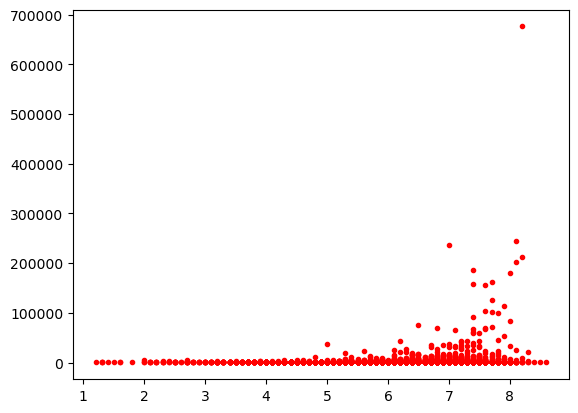

French


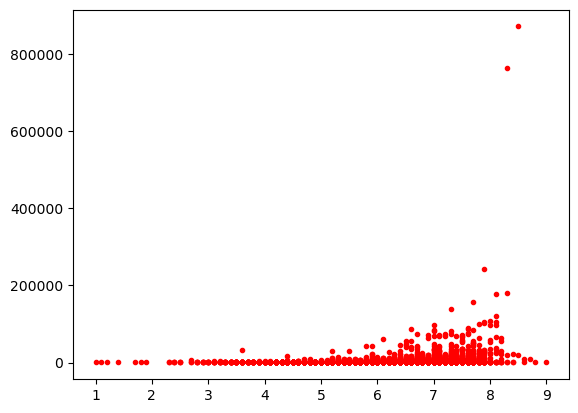

German


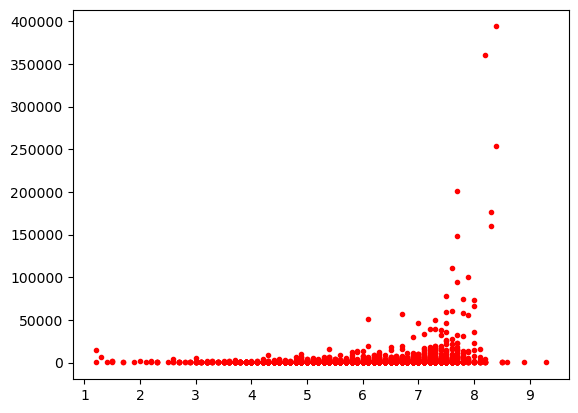

Italian


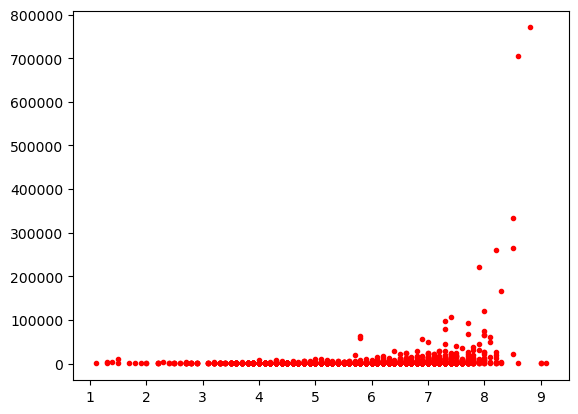

Japanese


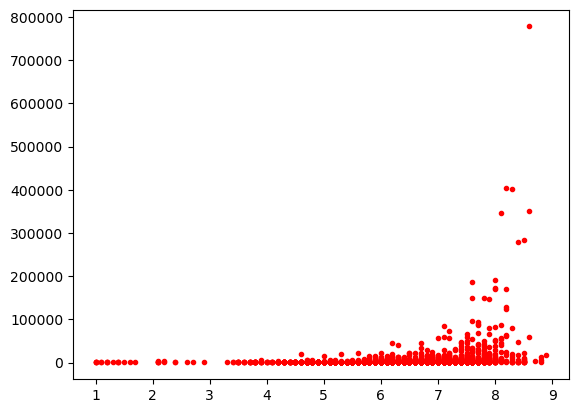

In [11]:
#graph average rating vs number of votes for five languages with the most movies that isn't english
#1. Spanish, 2. French, 3. German, 4. Italian, 5. Japanese 

for i in top_30_lang[0:5]:
    ind_lang = "language == '"+ i + "' & numVotes>100"
    print(i)
    df_ino30 = movie_df.query(ind_lang)
    #df_ino30.hist(column='averageRating', bins=30, label = i)
    x = pd.DataFrame(df_ino30['numVotes']).to_numpy()
    y = pd.DataFrame(df_ino30['averageRating']).to_numpy()
    plt.plot(y, x, 'r.')
    plt.show()
    